---

# <center>★ AI / ML Project - Ad Budget Estimation ★

---

<img src="ad.jpg" style="width: 400px;"/>

---

### Description:
The advertising dataset captures the sales revenue generated with respect to advertisement costs across multiple channels like radio, tv, and newspapers. 

It is required to understand the impact of ad budgets on the overall sales.



### Objective:
- Understand the Dataset & cleanup (if required).
- Build Regression models to predict the sales w.r.t a single & multiple feature.
- Also evaluate the models & compare thier respective scores like R2, RMSE, etc.

---

## <center>1. Data Exploration

In [214]:
#Importing the basic librarires

import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,6]

import warnings 
warnings.filterwarnings('ignore')

In [215]:
#Importing the dataset

df = pd.read_csv('Advertising Budget and Sales.csv', index_col=0, names=['TV','Radio','Newspaper','Sales'], skiprows=1)
df.reset_index(drop=True, inplace=True)
original_dataset = df.copy(deep=True)
display(df.head())

print('\n\033[1mInference:\033[0m The Datset consists of {} features & {} samples.'.format(df.shape[1], df.shape[0]))

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9



Inference: The Datset consists of 4 features & 200 samples.


In [216]:
#Checking the dtypes of all the columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [217]:
#Checking the stats of all the columns

display(df.describe())
print('\n \033[1mInference:\033[0m The stats seem to be fine, let us do further analysis on the Dataset')

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000



 Inference: The stats seem to be fine, let us do further analysis on the Dataset


---

## <center> 2. Exploratory Data Analysis (EDA)

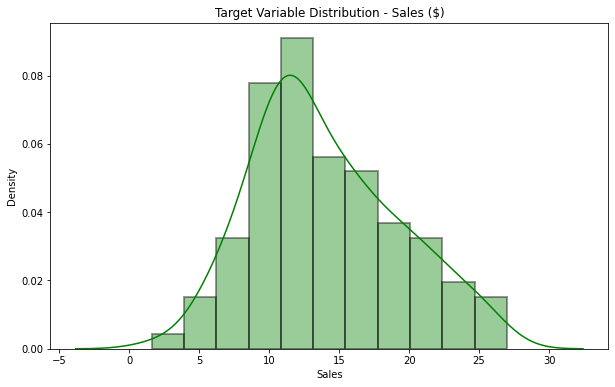


Inference: The Target Variable seems to be be normally distributed, averaging around 12$(units)


In [218]:
#Let us first analyze the distribution of the target variable

c = df.columns
sns.distplot(df[c[3]], color='g',hist_kws=dict(edgecolor="black", linewidth=2))
plt.title('Target Variable Distribution - Sales ($)')
plt.show()

print('\n\033[1mInference:\033[0m The Target Variable seems to be be normally distributed, averaging around 12$(units)')

                                                    Features Distribution                                                     


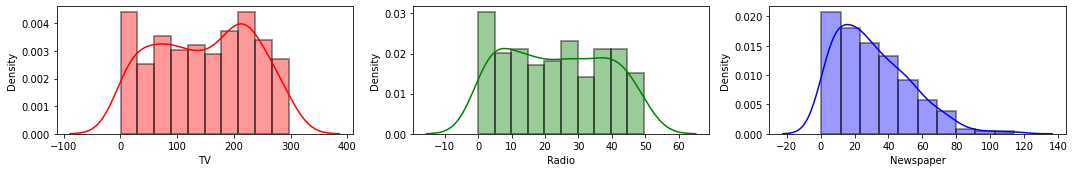

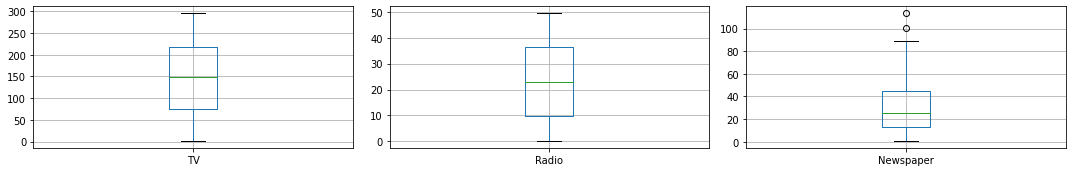


Inference: The dataset for all the features seem to be sqewed towards the right. Also there seems to be some outlier in the Newspaper ad budget feature


In [219]:
#Understanding the features set

print('\033[1mFeatures Distribution'.center(130))

clr=['r','g','b']

plt.figure(figsize=[15,2.5])
for i in range(3):
    plt.subplot(1,3,i+1)
    sns.distplot(df[c[i]],hist_kws=dict(edgecolor="black", linewidth=2), bins=10, color=clr[i])
plt.tight_layout()
plt.show()

plt.figure(figsize=[15,2.5])
for i in range(3):
    plt.subplot(1,3,i+1)
    df.boxplot(df.columns[i])
plt.tight_layout()
plt.show()

print('\n\033[1mInference:\033[0m The dataset for all the features seem to be sqewed towards the right. Also there \
seems to be some outlier in the Newspaper ad budget feature')

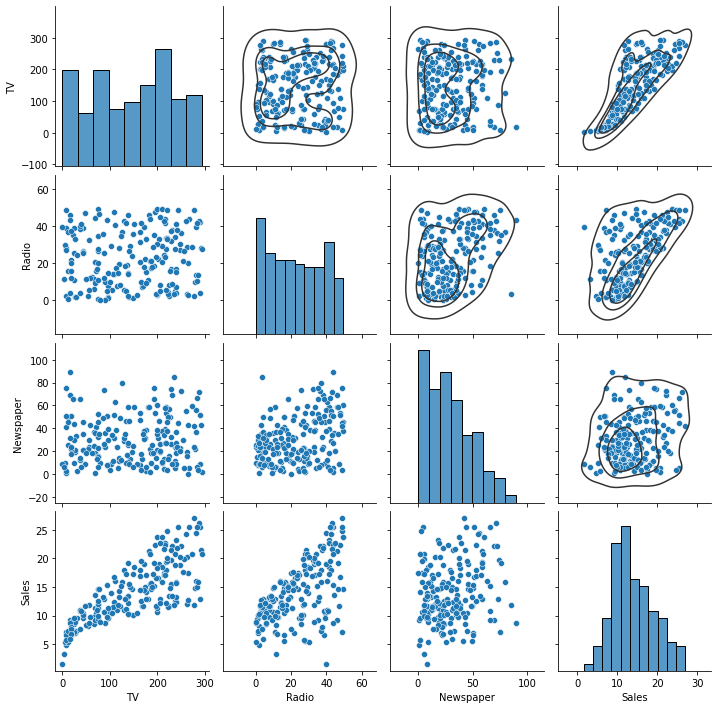


Inference: There is clear linear relationship between TV & Sales, which indicated good explainability.While the relationship between the variables seems to be quiet random


In [357]:
#Understanding the relationship between all the features

g = sns.pairplot(df)
g.map_upper(sns.kdeplot, levels=4, color=".2")
plt.show()

print('\n\033[1mInference:\033[0m There is clear linear relationship between TV & Sales, which indicated good explainability.\
While the relationship between the variables seems to be quiet random')

---

## <center> 3. Data Preprocessing

In [221]:
#Check for empty elements

print(df.isnull().sum())
print('\n\033[1mInference:\033[0m The dataset doesn\'t have any null elements')

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

Inference: The dataset doesn't have any null elements


In [222]:
#Removal of any Duplicate rows (if any)

counter = 0
rs,cs = df.shape

df.drop_duplicates(inplace=True)

if df.shape==(rs,cs):
    print('\n\033[1mInference:\033[0m The dataset doesn\'t have any duplicates')
else:
    print(f'\n\033[1mInference:\033[0m Number of duplicates dropped/fixed ---> {r-df.shape[0]}')


Inference: The dataset doesn't have any duplicates


In [223]:
#Removal of outlier:

for i in df.columns:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    df = df[df[i] <= (Q3+(1.5*IQR))]
    df = df[df[i] >= (Q1-(1.5*IQR))]
    df = df.reset_index(drop=True)
display(df)
print('\n\033[1mInference:\033[0m After removal of outliers, The dataset now has {} features & {} samples.'.format(df.shape[1], df.shape[0]))

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
193,38.2,3.7,13.8,7.6
194,94.2,4.9,8.1,9.7
195,177.0,9.3,6.4,12.8
196,283.6,42.0,66.2,25.5



Inference: After removal of outliers, The dataset now has 4 features & 198 samples.


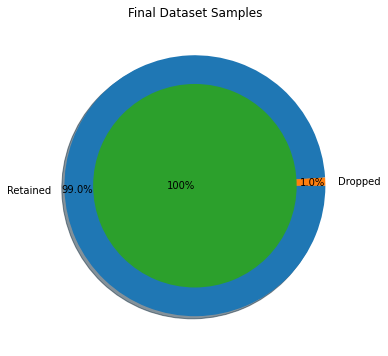


Inference: After the cleanup process, 2 samples were dropped, while retaining 99.0% of the data.


In [224]:
#Final Dataset size after performing Preprocessing

plt.title('Final Dataset Samples')
plt.pie([df.shape[0], original_dataset.shape[0]-df.shape[0]], radius = 1, labels=['Retained','Dropped'], counterclock=False, 
        autopct='%1.1f%%', pctdistance=0.9, explode=[0,0], shadow=True)
plt.pie([df.shape[0]], labels=['100%'], labeldistance=-0, radius=0.78)
plt.show()

print(f'\n\033[1mInference:\033[0m After the cleanup process, {original_dataset.shape[0]-df.shape[0]} samples were dropped, \
while retaining {df.shape[0]/(original_dataset.shape[0]-df.shape[0])}% of the data.')

---

## <center> 4. Feature Selection/Extraction

<AxesSubplot:>

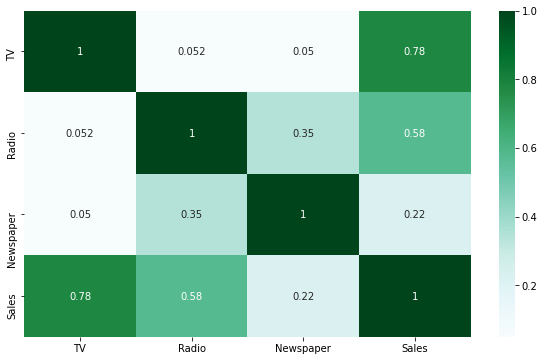

In [225]:
sns.heatmap(df.corr(), cmap='BuGn', annot=True)
plt.show()

---

## <center> 5. Data Manipulation

In [226]:
#Splitting the data intro training & testing sets

from sklearn.model_selection import train_test_split

X = df.drop(['Sales'],axis=1)
Y = df.Sales
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=100)

print('Original set  ---> ',X.shape,Y.shape,'\nTraining set  ---> ',Train_X.shape,Train_Y.shape,'\nTesting set   ---> ', Test_X.shape,'', Test_Y.shape)

Original set  --->  (198, 3) (198,) 
Training set  --->  (158, 3) (158,) 
Testing set   --->  (40, 3)  (40,)


In [227]:
#Feature Scaling (Standardization)

from sklearn.preprocessing import StandardScaler

std = StandardScaler()

Train_X_std = std.fit_transform(Train_X)
Train_X_std = pd.DataFrame(Train_X_std, columns=X.columns)
Test_X_std = std.transform(Test_X)
Test_X_std = pd.DataFrame(Test_X_std, columns=X.columns)

---

## <center> 6. Linear Regression Model

<img src="l.png" style="width: 400px;"/>

In [228]:
#Creating a Linear Regression model with statsmodels

from statsmodels.formula import api
API = api.ols(formula=f'{c[3]} ~ {c[0]}', data=df).fit()
#print(API.conf_int())
#print(API.pvalues)
API.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     302.8
Date:                Mon, 08 Nov 2021   Prob (F-statistic):           1.29e-41
Time:                        19:35:15   Log-Likelihood:                -514.27
No. Observations:                 198   AIC:                             1033.
Df Residuals:                     196   BIC:                             1039.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0306      0.462     15.219      0.000       6.120       7.942
TV             0.0474      0.003     17.400      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.404   Durbin-Watson:                   1.872
Prob(Omnibus):                  0.817   Jarque-Bera (JB):                0.551
Skew:                          -0.062   Prob(JB):                        0.759
Kurtosis:                       2.774   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The Coeffecient of the Linear Regresion Model was found to be  [3.82929935]
The Intercept of the Linear Regresion Model was found to be  14.000632911392405


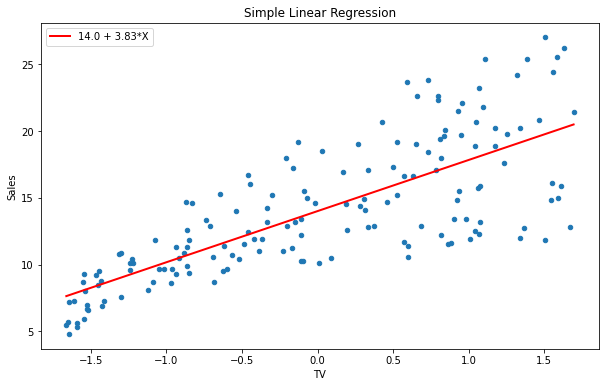

In [229]:
#Creating a Simple Linear Regression model with Sklearn

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

SLR = LinearRegression().fit(Train_X_std[[c[0]]],Train_Y)

print('The Coeffecient of the Linear Regresion Model was found to be ',SLR.coef_)
print('The Intercept of the Linear Regresion Model was found to be ',SLR.intercept_)

#Plotting predicted regression Line

Xmm = pd.DataFrame({'TV':[Train_X_std[[c[0]]].min().values[0],Train_X_std[[c[0]]].max().values[0]]})
RLine = SLR.predict(Xmm)

pd.concat([Train_X_std, pd.DataFrame(Train_Y.values, columns=['Sales'])], axis=1).plot(kind='scatter',x=c[0],y=c[3])
plt.plot(Xmm,RLine, c='r',linewidth=2, label=f'{round(SLR.intercept_,2)} + {round(SLR.coef_[0],2)}*X')
plt.title('Simple Linear Regression')
plt.legend()
plt.show()

<<<-----------------------------------Evaluating Simple Linear Regression Model----------------------------------->>>



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.58
Residual Sum of Squares (RSS) on Training set  ---> 1681.01
Mean Squared Error (MSE) on Training set       ---> 10.64
Root Mean Squared Error (RMSE) on Training set ---> 3.26

--------------------Test Set Metrics--------------------

R2-Score on Testing set ---> 0.68
Residual Sum of Squares (RSS) on Training set  ---> 418.4
Mean Squared Error (MSE) on Training set       ---> 10.46
Root Mean Squared Error (RMSE) on Training set ---> 3.23

--------------------Residual Plots--------------------


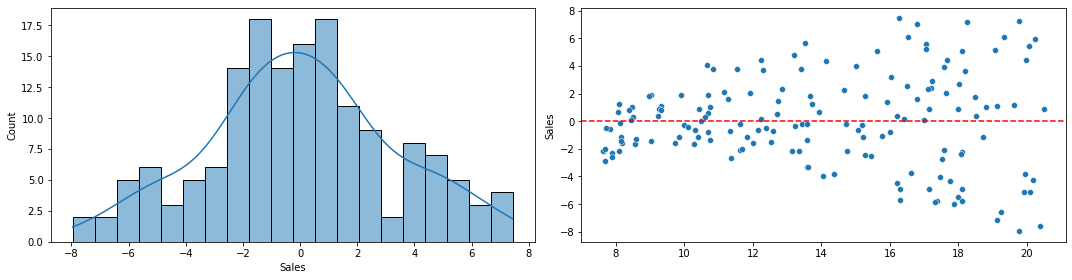


 -------------------------------------------------------

Inference: 
As we can observe from the summary of the Simple Linear Regression Model, we can note that the regression line fits well on the data & the error terms are normally distributed. Let us futher check if we get Resiudal scores for multiple regression model


In [230]:
#Evaluating the Simple Linear Regression Model

print('{}{}\033[1mEvaluating Simple Linear Regression Model\033[0m{}{}\n'.format('<'*3,'-'*35, '-'*35,'>'*3))

print('\n\n{}Training Set Metrics{}'.format('-'*20, '-'*20))
pred1 = SLR.predict(Train_X_std[[c[0]]])#Test_X_sm)
print('\nR2-Score on Training set --->',round(r2_score(Train_Y, pred1),2))
print('Residual Sum of Squares (RSS) on Training set  --->',round(np.sum(np.square(Train_Y-pred1)),2))
print('Mean Squared Error (MSE) on Training set       --->',round(mean_squared_error(Train_Y, pred1),2))
print('Root Mean Squared Error (RMSE) on Training set --->',round(np.sqrt(mean_squared_error(Train_Y, pred1)),2))

print('\n{}Test Set Metrics{}'.format('-'*20, '-'*20))
pred2 = SLR.predict(Test_X_std[[c[0]]])#Test_X_sm)
print('\nR2-Score on Testing set --->',round(r2_score(Test_Y, pred2),2))
print('Residual Sum of Squares (RSS) on Training set  --->',round(np.sum(np.square(Test_Y-pred2)),2))
print('Mean Squared Error (MSE) on Training set       --->',round(mean_squared_error(Test_Y, pred2),2))
print('Root Mean Squared Error (RMSE) on Training set --->',round(np.sqrt(mean_squared_error(Test_Y, pred2)),2))
print('\n{}Residual Plots{}'.format('-'*20, '-'*20))

plt.figure(figsize=[15,4])

plt.subplot(1,2,1)
residuals=(Train_Y-pred1)
sns.histplot(residuals, bins=20, kde=True)

plt.subplot(1,2,2)
sns.scatterplot(pred1, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.tight_layout()
plt.show()

print('\n','-'*55)

print('\033[1m\nInference: \033[0m\nAs we can observe from the summary of the Simple Linear Regression Model, we can note \
that the regression line fits well on the data & the error terms are normally distributed. Let us futher check if we get \
Resiudal scores for multiple regression model')

In [231]:
#Let create a function to store the results of all the regression models

Model_Evaluation_Comparison_Matrix = pd.DataFrame(np.zeros([7,7]), columns=['R2-Score','Train_RSS', 'Train_MSE','Train_RMSE','Test_RSS', 'Test_MSE','Test_RMSE'])
Model_Evaluation_Comparison_Matrix.index=['SLR', 'MLR', 'RLR', 'LLR', 'ENR', 'PR3', 'PR6']
Model_Evaluation_Comparison_Matrix

def ME(p1,p2,a):
    Model_Evaluation_Comparison_Matrix.loc[a,'R2-Score']=round(r2_score(Train_Y, pred1),2)
    Model_Evaluation_Comparison_Matrix.loc[a,'Train_RSS']=round(np.sum(np.square(Train_Y-pred1)),2)
    Model_Evaluation_Comparison_Matrix.loc[a,'Train_MSE']=round(mean_squared_error(Train_Y, pred1),2)
    Model_Evaluation_Comparison_Matrix.loc[a,'Train_RMSE']=round(np.sqrt(mean_squared_error(Train_Y, pred1)),2)
    Model_Evaluation_Comparison_Matrix.loc[a,'Test_RSS']=round(np.sum(np.square(Test_Y-pred2)),2)
    Model_Evaluation_Comparison_Matrix.loc[a,'Test_MSE']=round(mean_squared_error(Test_Y, pred2),2)
    Model_Evaluation_Comparison_Matrix.loc[a,'Test_RMSE']=round(np.sqrt(mean_squared_error(Test_Y, pred2)),2)

ME(pred1, pred2,'SLR')

Model_Evaluation_Comparison_Matrix

,R2-Score,Train_RSS,Train_MSE,Train_RMSE,Test_RSS,Test_MSE,Test_RMSE
SLR,0.58,1681.01,10.64,3.26,418.4,10.46,3.23
MLR,0.00,0.00,0.00,0.00,0.0,0.00,0.00
RLR,0.00,0.00,0.00,0.00,0.0,0.00,0.00
LLR,0.00,0.00,0.00,0.00,0.0,0.00,0.00
ENR,0.00,0.00,0.00,0.00,0.0,0.00,0.00
PR3,0.00,0.00,0.00,0.00,0.0,0.00,0.00
PR6,0.00,0.00,0.00,0.00,0.0,0.00,0.00


---

## <center> 7. Multiple Linear Regression Model

<img src="mr.png" style="width: 600px;"/>

In [232]:
#Creating a Linear Regression model with statsmodels

from statsmodels.formula import api
API = api.ols(formula=f'{c[3]} ~ {c[0]} + {c[1]} + {c[2]}', data=df).fit()
#print(API.conf_int())
#print(API.pvalues)
API.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     553.5
Date:                Mon, 08 Nov 2021   Prob (F-statistic):           8.35e-95
Time:                        19:35:16   Log-Likelihood:                -383.24
No. Observations:                 198   AIC:                             774.5
Df Residuals:                     194   BIC:                             787.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9523      0.318      9.280      0.000       2.325       3.580
TV             0.0457      0.001     32.293      0.000       0.043       0.048
Radio          0.1886      0.009     21.772      0.000       0.171       0.206
Newspaper     -0.0012      0.006     -0.187      0.852      -0.014       0.011
==============================================================================
Omnibus:                       59.593   Durbin-Watson:                   2.041
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              147.654
Skew:                          -1.324   Prob(JB):                     8.66e-33
Kurtosis:                       6.299   Cond. No.                         457.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The Coeffecient of the Linear Regresion Model was found to be  [ 3.69637815  2.94662484 -0.19283051]
The Intercept of the Linear Regresion Model was found to be  14.000632911392405


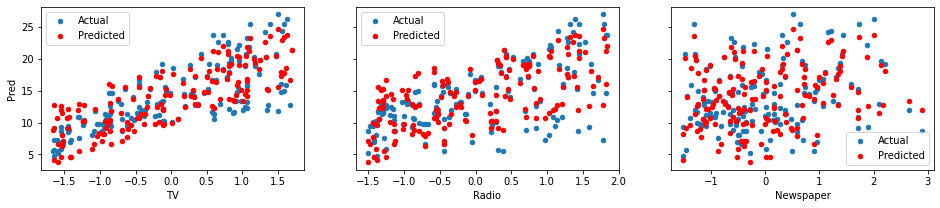

In [233]:
#Creating a Multiple Linear Regression model with Sklearn

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

MLR = LinearRegression().fit(Train_X_std,Train_Y)

print('The Coeffecient of the Linear Regresion Model was found to be ',MLR.coef_)
print('The Intercept of the Linear Regresion Model was found to be ',MLR.intercept_)

#Plotting predicted predicteds alongside the actual datapoints 

pred = MLR.predict(Train_X_std)

fig,axs = plt.subplots(1,3, sharey=True)
Tr=pd.concat([Train_X_std, pd.DataFrame(Train_Y.values, columns=['Sales'])], axis=1)
Ts=pd.concat([Test_X_std, pd.DataFrame(Test_Y.values, columns=['Sales'])], axis=1)

Pr = Tr.copy()
Pr['Pred'] = pred

Tr.plot(kind='scatter',x='TV',y='Sales', ax=axs[0], figsize=(16,3), label='Actual')
Pr.plot(kind='scatter',x='TV',y='Pred',ax=axs[0], color='r', label='Predicted')

Tr.plot(kind='scatter',x='Radio',y='Sales',ax=axs[1], label='Actual')
Pr.plot(kind='scatter',x='Radio',y='Pred',ax=axs[1], color='r', label='Predicted')

Tr.plot(kind='scatter',x='Newspaper',y='Sales',ax=axs[2], label='Actual')
Pr.plot(kind='scatter',x='Newspaper',y='Pred',ax=axs[2], color='r', label='Predicted')

plt.show()

<<<-----------------------------------Evaluating Simple Linear Regression Model----------------------------------->>>



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.9
Residual Sum of Squares (RSS) on Training set  ---> 381.14
Mean Squared Error (MSE) on Training set       ---> 2.41
Root Mean Squared Error (RMSE) on Training set ---> 1.55

--------------------Test Set Metrics--------------------

R2-Score on Testing set ---> 0.86
Residual Sum of Squares (RSS) on Training set  ---> 190.69
Mean Squared Error (MSE) on Training set       ---> 4.77
Root Mean Squared Error (RMSE) on Training set ---> 2.18

--------------------Residual Plots--------------------


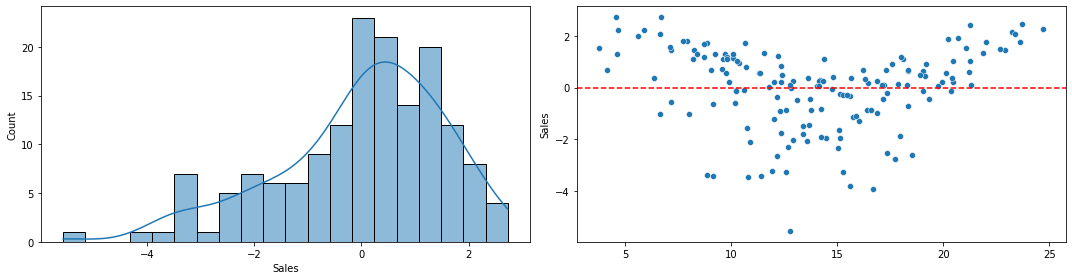


 -------------------------------------------------------

Inference: 
As we can observe from the summary of the Multiple Regression Model, we can note that it performs better compared to the SLR, but the error terms are slightly not normally distributed around 0. Let us futher check for the Resiudal scores for other regression models


In [234]:
#Evaluating the Multiple Linear Regression Model

print('{}{}\033[1mEvaluating Simple Linear Regression Model\033[0m{}{}\n'.format('<'*3,'-'*35, '-'*35,'>'*3))

print('\n\n{}Training Set Metrics{}'.format('-'*20, '-'*20))
pred1 = MLR.predict(Train_X_std)#Test_X_sm)
print('\nR2-Score on Training set --->',round(r2_score(Train_Y, pred1),2))
print('Residual Sum of Squares (RSS) on Training set  --->',round(np.sum(np.square(Train_Y-pred1)),2))
print('Mean Squared Error (MSE) on Training set       --->',round(mean_squared_error(Train_Y, pred1),2))
print('Root Mean Squared Error (RMSE) on Training set --->',round(np.sqrt(mean_squared_error(Train_Y, pred1)),2))

print('\n{}Test Set Metrics{}'.format('-'*20, '-'*20))
pred2 = MLR.predict(Test_X_std)#Test_X_sm)
print('\nR2-Score on Testing set --->',round(r2_score(Test_Y, pred2),2))
print('Residual Sum of Squares (RSS) on Training set  --->',round(np.sum(np.square(Test_Y-pred2)),2))
print('Mean Squared Error (MSE) on Training set       --->',round(mean_squared_error(Test_Y, pred2),2))
print('Root Mean Squared Error (RMSE) on Training set --->',round(np.sqrt(mean_squared_error(Test_Y, pred2)),2))
print('\n{}Residual Plots{}'.format('-'*20, '-'*20))

ME(pred1, pred2,'MLR')
plt.figure(figsize=[15,4])

plt.subplot(1,2,1)
residuals=(Train_Y-pred1)
sns.histplot(residuals, bins=20, kde=True)

plt.subplot(1,2,2)
sns.scatterplot(pred1, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.tight_layout()
plt.show()

print('\n','-'*55)

print('\033[1m\nInference: \033[0m\nAs we can observe from the summary of the Multiple Regression Model, we can note \
that it performs better compared to the SLR, but the error terms are slightly not normally distributed around 0. \
Let us futher check for the Resiudal scores for other regression models')

---

## <center> 8. Ridge, Lasso & ElasticNet Regression Models

<img src="ridge.png" style="width: 500px;"/>

<<<-----------------------------------Training Ridge Regression Model----------------------------------->>>

The Coeffecient of the Linear Regresion Model was found to be  [ 3.67402151  2.92473564 -0.18230258]
The Intercept of the Linear Regresion Model was found to be  14.000632911392405


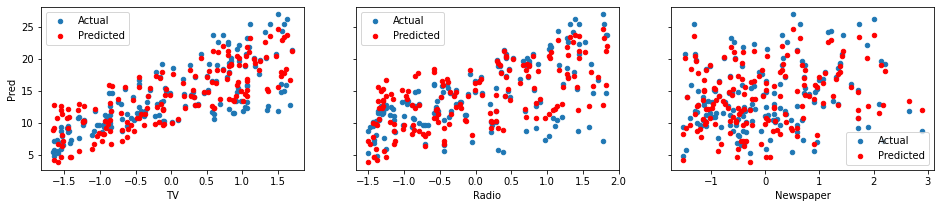

<<<-----------------------------------Evaluating Ridge Regression Model----------------------------------->>>



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.9
Residual Sum of Squares (RSS) on Training set  ---> 381.29
Mean Squared Error (MSE) on Training set       ---> 2.41
Root Mean Squared Error (RMSE) on Training set ---> 1.55

--------------------Test Set Metrics--------------------

R2-Score on Testing set ---> 0.86
Residual Sum of Squares (RSS) on Training set  ---> 191.07
Mean Squared Error (MSE) on Training set       ---> 4.78
Root Mean Squared Error (RMSE) on Training set ---> 2.19

--------------------Residual Plots--------------------


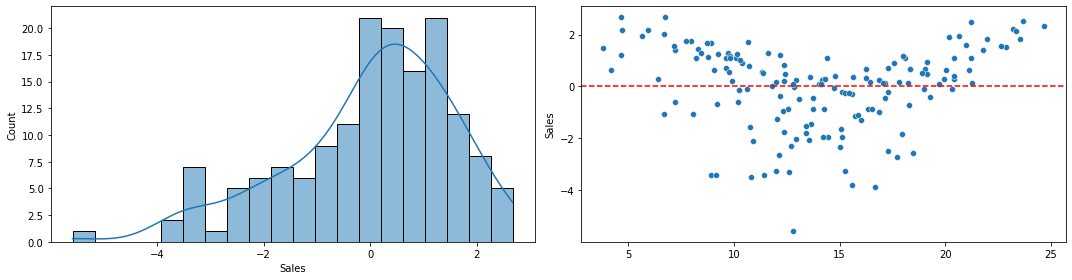


 -------------------------------------------------------

Inference: 
As we can observe from the summary of the Multiple Regression Model, we can note that it performs better compared to the SLR, but the error terms are slightly not normally distributed around 0. Let us futher check for the Resiudal scores for other regression models


In [235]:
#Creating a Ridge Regression model

from sklearn.linear_model import Ridge

print('{}{}\033[1mTraining Ridge Regression Model\033[0m{}{}\n'.format('<'*3,'-'*35, '-'*35,'>'*3))

RLR = Ridge().fit(Train_X_std,Train_Y)

print('The Coeffecient of the Linear Regresion Model was found to be ',RLR.coef_)
print('The Intercept of the Linear Regresion Model was found to be ',RLR.intercept_)

#Plotting predicted predicteds alongside the actual datapoints 

pred = RLR.predict(Train_X_std)

fig,axs = plt.subplots(1,3, sharey=True)
Tr=pd.concat([Train_X_std, pd.DataFrame(Train_Y.values, columns=['Sales'])], axis=1)
Ts=pd.concat([Test_X_std, pd.DataFrame(Test_Y.values, columns=['Sales'])], axis=1)

Pr = Tr.copy()
Pr['Pred'] = pred

Tr.plot(kind='scatter',x='TV',y='Sales', ax=axs[0], figsize=(16,3), label='Actual')
Pr.plot(kind='scatter',x='TV',y='Pred',ax=axs[0], color='r', label='Predicted')

Tr.plot(kind='scatter',x='Radio',y='Sales',ax=axs[1], label='Actual')
Pr.plot(kind='scatter',x='Radio',y='Pred',ax=axs[1], color='r', label='Predicted')

Tr.plot(kind='scatter',x='Newspaper',y='Sales',ax=axs[2], label='Actual')
Pr.plot(kind='scatter',x='Newspaper',y='Pred',ax=axs[2], color='r', label='Predicted')

plt.show()

#Evaluating the Simple Linear Regression Model

print('{}{}\033[1mEvaluating Ridge Regression Model\033[0m{}{}\n'.format('<'*3,'-'*35, '-'*35,'>'*3))

print('\n\n{}Training Set Metrics{}'.format('-'*20, '-'*20))
pred1 = RLR.predict(Train_X_std)#Test_X_sm)
print('\nR2-Score on Training set --->',round(r2_score(Train_Y, pred1),2))
print('Residual Sum of Squares (RSS) on Training set  --->',round(np.sum(np.square(Train_Y-pred1)),2))
print('Mean Squared Error (MSE) on Training set       --->',round(mean_squared_error(Train_Y, pred1),2))
print('Root Mean Squared Error (RMSE) on Training set --->',round(np.sqrt(mean_squared_error(Train_Y, pred1)),2))

print('\n{}Test Set Metrics{}'.format('-'*20, '-'*20))
pred2 = RLR.predict(Test_X_std)#Test_X_sm)
print('\nR2-Score on Testing set --->',round(r2_score(Test_Y, pred2),2))
print('Residual Sum of Squares (RSS) on Training set  --->',round(np.sum(np.square(Test_Y-pred2)),2))
print('Mean Squared Error (MSE) on Training set       --->',round(mean_squared_error(Test_Y, pred2),2))
print('Root Mean Squared Error (RMSE) on Training set --->',round(np.sqrt(mean_squared_error(Test_Y, pred2)),2))
print('\n{}Residual Plots{}'.format('-'*20, '-'*20))

ME(pred1, pred2,'RLR')
plt.figure(figsize=[15,4])

plt.subplot(1,2,1)
residuals=(Train_Y-pred1)
sns.histplot(residuals, bins=20, kde=True)

plt.subplot(1,2,2)
sns.scatterplot(pred1, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.tight_layout()
plt.show()

print('\n','-'*55)

print('\033[1m\nInference: \033[0m\nAs we can observe from the summary of the Multiple Regression Model, we can note \
that it performs better compared to the SLR, but the error terms are slightly not normally distributed around 0. \
Let us futher check for the Resiudal scores for other regression models')

---

<img src="lasso.png" style="width: 500px;"/>

<<<-----------------------------------Training Lasso Regression Model----------------------------------->>>

The Coeffecient of the Linear Regresion Model was found to be  [2.74190729 1.909689   0.        ]
The Intercept of the Linear Regresion Model was found to be  14.000632911392405


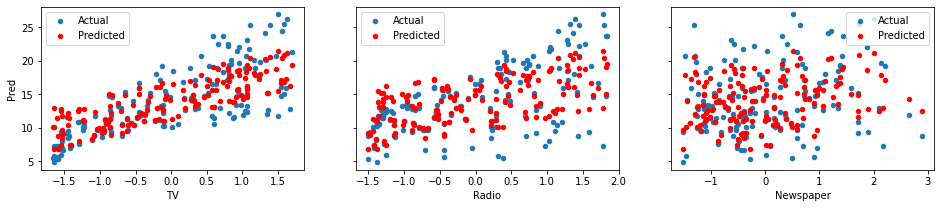

<<<-----------------------------------Evaluating Lasso Regression Model----------------------------------->>>



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.83
Residual Sum of Squares (RSS) on Training set  ---> 688.16
Mean Squared Error (MSE) on Training set       ---> 4.36
Root Mean Squared Error (RMSE) on Training set ---> 2.09

--------------------Test Set Metrics--------------------

R2-Score on Testing set ---> 0.77
Residual Sum of Squares (RSS) on Training set  ---> 299.78
Mean Squared Error (MSE) on Training set       ---> 7.49
Root Mean Squared Error (RMSE) on Training set ---> 2.74

--------------------Residual Plots--------------------


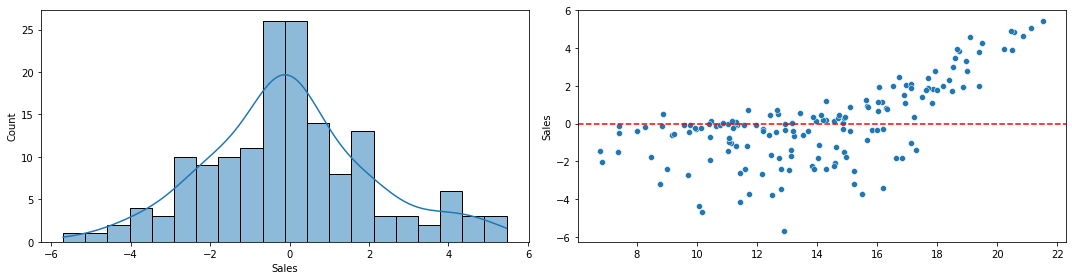


 -------------------------------------------------------

Inference: 
As we can observe from the summary of the Multiple Regression Model, we can note that it performs better compared to the SLR, but the error terms are slightly not normally distributed around 0. Let us futher check for the Resiudal scores for other regression models


In [236]:
#Creating a Ridge Regression model

from sklearn.linear_model import Lasso

print('{}{}\033[1mTraining Lasso Regression Model\033[0m{}{}\n'.format('<'*3,'-'*35, '-'*35,'>'*3))

LLR = Lasso().fit(Train_X_std,Train_Y)

print('The Coeffecient of the Linear Regresion Model was found to be ',LLR.coef_)
print('The Intercept of the Linear Regresion Model was found to be ',LLR.intercept_)

#Plotting predicted predicteds alongside the actual datapoints 

pred = LLR.predict(Train_X_std)

fig,axs = plt.subplots(1,3, sharey=True)
Tr=pd.concat([Train_X_std, pd.DataFrame(Train_Y.values, columns=['Sales'])], axis=1)
Ts=pd.concat([Test_X_std, pd.DataFrame(Test_Y.values, columns=['Sales'])], axis=1)

Pr = Tr.copy()
Pr['Pred'] = pred

Tr.plot(kind='scatter',x='TV',y='Sales', ax=axs[0], figsize=(16,3), label='Actual')
Pr.plot(kind='scatter',x='TV',y='Pred',ax=axs[0], color='r', label='Predicted')

Tr.plot(kind='scatter',x='Radio',y='Sales',ax=axs[1], label='Actual')
Pr.plot(kind='scatter',x='Radio',y='Pred',ax=axs[1], color='r', label='Predicted')

Tr.plot(kind='scatter',x='Newspaper',y='Sales',ax=axs[2], label='Actual')
Pr.plot(kind='scatter',x='Newspaper',y='Pred',ax=axs[2], color='r', label='Predicted')

plt.show()

#Evaluating the Simple Linear Regression Model

print('{}{}\033[1mEvaluating Lasso Regression Model\033[0m{}{}\n'.format('<'*3,'-'*35, '-'*35,'>'*3))

print('\n\n{}Training Set Metrics{}'.format('-'*20, '-'*20))
pred1 = LLR.predict(Train_X_std)#Test_X_sm)
print('\nR2-Score on Training set --->',round(r2_score(Train_Y, pred1),2))
print('Residual Sum of Squares (RSS) on Training set  --->',round(np.sum(np.square(Train_Y-pred1)),2))
print('Mean Squared Error (MSE) on Training set       --->',round(mean_squared_error(Train_Y, pred1),2))
print('Root Mean Squared Error (RMSE) on Training set --->',round(np.sqrt(mean_squared_error(Train_Y, pred1)),2))

print('\n{}Test Set Metrics{}'.format('-'*20, '-'*20))
pred2 = LLR.predict(Test_X_std)#Test_X_sm)
print('\nR2-Score on Testing set --->',round(r2_score(Test_Y, pred2),2))
print('Residual Sum of Squares (RSS) on Training set  --->',round(np.sum(np.square(Test_Y-pred2)),2))
print('Mean Squared Error (MSE) on Training set       --->',round(mean_squared_error(Test_Y, pred2),2))
print('Root Mean Squared Error (RMSE) on Training set --->',round(np.sqrt(mean_squared_error(Test_Y, pred2)),2))
print('\n{}Residual Plots{}'.format('-'*20, '-'*20))

ME(pred1, pred2,'LLR')
plt.figure(figsize=[15,4])

plt.subplot(1,2,1)
residuals=(Train_Y-pred1)
sns.histplot(residuals, bins=20, kde=True)

plt.subplot(1,2,2)
sns.scatterplot(pred1, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.tight_layout()
plt.show()

print('\n','-'*55)

print('\033[1m\nInference: \033[0m\nAs we can observe from the summary of the Multiple Regression Model, we can note \
that it performs better compared to the SLR, but the error terms are slightly not normally distributed around 0. \
Let us futher check for the Resiudal scores for other regression models')

---

<img src="en.png" style="width: 500px;"/>

<<<-----------------------------------Training ElasticNet Regression Model----------------------------------->>>

The Coeffecient of the Linear Regresion Model was found to be  [2.16999006 1.62390763 0.        ]
The Intercept of the Linear Regresion Model was found to be  14.000632911392405


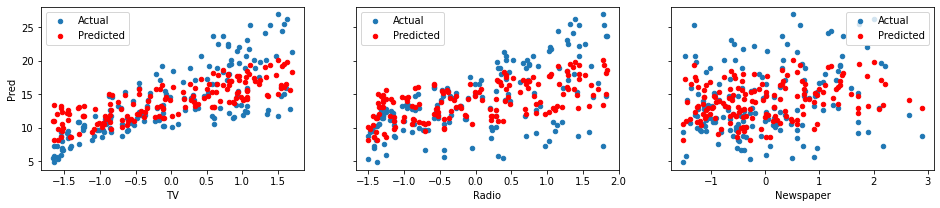

<<<-----------------------------------Evaluating ElasticNet Regression Model----------------------------------->>>



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.74
Residual Sum of Squares (RSS) on Training set  ---> 1026.14
Mean Squared Error (MSE) on Training set       ---> 6.49
Root Mean Squared Error (RMSE) on Training set ---> 2.55

--------------------Test Set Metrics--------------------

R2-Score on Testing set ---> 0.68
Residual Sum of Squares (RSS) on Training set  ---> 422.57
Mean Squared Error (MSE) on Training set       ---> 10.56
Root Mean Squared Error (RMSE) on Training set ---> 3.25

--------------------Residual Plots--------------------


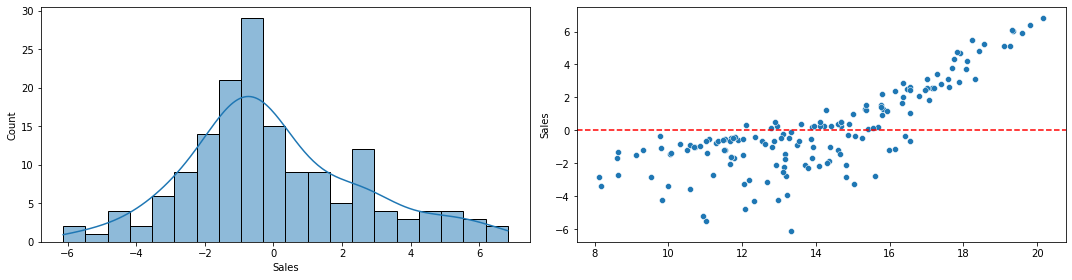


 -------------------------------------------------------

Inference: 
As we can observe from the summary of the Multiple Regression Model, we can note that it performs better compared to the SLR, but the error terms are slightly not normally distributed around 0. Let us futher check for the Resiudal scores for other regression models


In [237]:
#Creating a ElasticNet Regression model

from sklearn.linear_model import ElasticNet

print('{}{}\033[1mTraining ElasticNet Regression Model\033[0m{}{}\n'.format('<'*3,'-'*35, '-'*35,'>'*3))

ENR = ElasticNet().fit(Train_X_std,Train_Y)

print('The Coeffecient of the Linear Regresion Model was found to be ',ENR.coef_)
print('The Intercept of the Linear Regresion Model was found to be ',ENR.intercept_)

#Plotting predicted predicteds alongside the actual datapoints 

pred = ENR.predict(Train_X_std)

fig,axs = plt.subplots(1,3, sharey=True)
Tr=pd.concat([Train_X_std, pd.DataFrame(Train_Y.values, columns=['Sales'])], axis=1)
Ts=pd.concat([Test_X_std, pd.DataFrame(Test_Y.values, columns=['Sales'])], axis=1)

Pr = Tr.copy()
Pr['Pred'] = pred

Tr.plot(kind='scatter',x='TV',y='Sales', ax=axs[0], figsize=(16,3), label='Actual')
Pr.plot(kind='scatter',x='TV',y='Pred',ax=axs[0], color='r', label='Predicted')

Tr.plot(kind='scatter',x='Radio',y='Sales',ax=axs[1], label='Actual')
Pr.plot(kind='scatter',x='Radio',y='Pred',ax=axs[1], color='r', label='Predicted')

Tr.plot(kind='scatter',x='Newspaper',y='Sales',ax=axs[2], label='Actual')
Pr.plot(kind='scatter',x='Newspaper',y='Pred',ax=axs[2], color='r', label='Predicted')

plt.show()

#Evaluating the Simple Linear Regression Model

print('{}{}\033[1mEvaluating ElasticNet Regression Model\033[0m{}{}\n'.format('<'*3,'-'*35, '-'*35,'>'*3))

print('\n\n{}Training Set Metrics{}'.format('-'*20, '-'*20))
pred1 = ENR.predict(Train_X_std)#Test_X_sm)
print('\nR2-Score on Training set --->',round(r2_score(Train_Y, pred1),2))
print('Residual Sum of Squares (RSS) on Training set  --->',round(np.sum(np.square(Train_Y-pred1)),2))
print('Mean Squared Error (MSE) on Training set       --->',round(mean_squared_error(Train_Y, pred1),2))
print('Root Mean Squared Error (RMSE) on Training set --->',round(np.sqrt(mean_squared_error(Train_Y, pred1)),2))

print('\n{}Test Set Metrics{}'.format('-'*20, '-'*20))
pred2 = ENR.predict(Test_X_std)#Test_X_sm)
print('\nR2-Score on Testing set --->',round(r2_score(Test_Y, pred2),2))
print('Residual Sum of Squares (RSS) on Training set  --->',round(np.sum(np.square(Test_Y-pred2)),2))
print('Mean Squared Error (MSE) on Training set       --->',round(mean_squared_error(Test_Y, pred2),2))
print('Root Mean Squared Error (RMSE) on Training set --->',round(np.sqrt(mean_squared_error(Test_Y, pred2)),2))
print('\n{}Residual Plots{}'.format('-'*20, '-'*20))

ME(pred1, pred2,'ENR')
plt.figure(figsize=[15,4])

plt.subplot(1,2,1)
residuals=(Train_Y-pred1)
sns.histplot(residuals, bins=20, kde=True)

plt.subplot(1,2,2)
sns.scatterplot(pred1, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.tight_layout()
plt.show()

print('\n','-'*55)

print('\033[1m\nInference: \033[0m\nAs we can observe from the summary of the Multiple Regression Model, we can note \
that it performs better compared to the SLR, but the error terms are slightly not normally distributed around 0. \
Let us futher check for the Resiudal scores for other regression models')

---

## <center> 9. Polynomial Regression Model

<img src="pn.png" style="width: 500px;"/>

The Coeffecient of the Linear Regresion Model was found to be  [ 0.00000000e+00  3.56696251e+00  2.89992429e+00 -6.09129639e-04
 -7.00059706e-01  1.30270164e+00  6.99507531e-03  2.68286612e-02
  2.17237704e-02 -1.93528832e-03]
The Intercept of the Linear Regresion Model was found to be  14.607032493223329


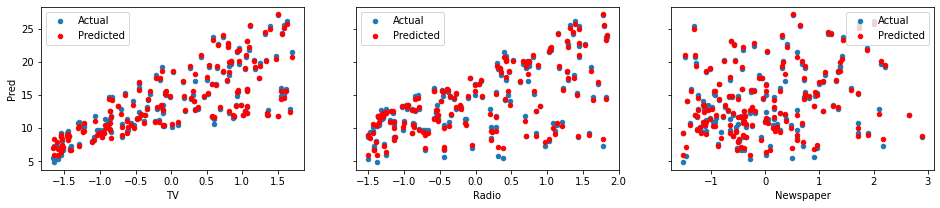

<<<-----------------------------------Evaluating ElasticNet Regression Model----------------------------------->>>



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.99
Residual Sum of Squares (RSS) on Training set  ---> 33.11
Mean Squared Error (MSE) on Training set       ---> 0.21
Root Mean Squared Error (RMSE) on Training set ---> 0.46

--------------------Test Set Metrics--------------------

R2-Score on Testing set ---> 0.97
Residual Sum of Squares (RSS) on Training set  ---> 45.89
Mean Squared Error (MSE) on Training set       ---> 1.15
Root Mean Squared Error (RMSE) on Training set ---> 1.07

--------------------Residual Plots--------------------


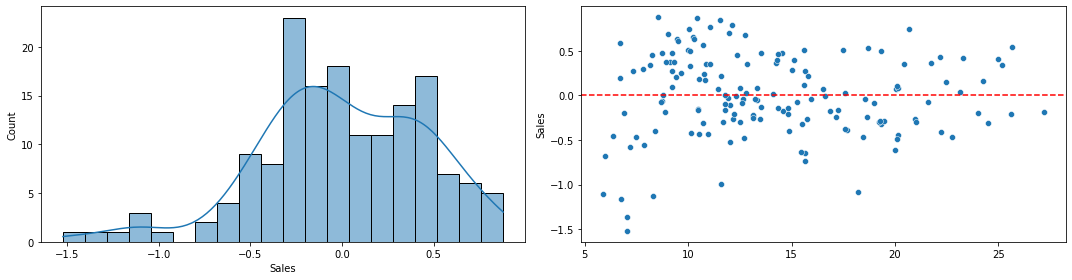


 -------------------------------------------------------

Inference: 
As we can observe from the summary of the 2nd order Polynomial Regression Model, we can note that it performs better compared to the MLR, Let us check with higher degree Models.


In [238]:
#Creating a Polynomial Regression model (degree=2)

from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(Train_X_std)
X_poly1 = poly_reg.fit_transform(Test_X_std)
PR2 = LinearRegression()
PR2.fit(X_poly, Train_Y)

print('The Coeffecient of the Linear Regresion Model was found to be ',PR2.coef_)
print('The Intercept of the Linear Regresion Model was found to be ',PR2.intercept_)

#Plotting predicted predicteds alongside the actual datapoints 

pred = PR2.predict(X_poly)

fig,axs = plt.subplots(1,3, sharey=True)
Tr=pd.concat([Train_X_std, pd.DataFrame(Train_Y.values, columns=['Sales'])], axis=1)
Ts=pd.concat([Test_X_std, pd.DataFrame(Test_Y.values, columns=['Sales'])], axis=1)

Pr = Tr.copy()
Pr['Pred'] = pred

Tr.plot(kind='scatter',x='TV',y='Sales', ax=axs[0], figsize=(16,3), label='Actual')
Pr.plot(kind='scatter',x='TV',y='Pred',ax=axs[0], color='r', label='Predicted')

Tr.plot(kind='scatter',x='Radio',y='Sales',ax=axs[1], label='Actual')
Pr.plot(kind='scatter',x='Radio',y='Pred',ax=axs[1], color='r', label='Predicted')

Tr.plot(kind='scatter',x='Newspaper',y='Sales',ax=axs[2], label='Actual')
Pr.plot(kind='scatter',x='Newspaper',y='Pred',ax=axs[2], color='r', label='Predicted')

plt.show()

#Evaluating the Simple Linear Regression Model

print('{}{}\033[1mEvaluating ElasticNet Regression Model\033[0m{}{}\n'.format('<'*3,'-'*35, '-'*35,'>'*3))

print('\n\n{}Training Set Metrics{}'.format('-'*20, '-'*20))
pred1 = PR2.predict(X_poly)#Test_X_sm)
print('\nR2-Score on Training set --->',round(r2_score(Train_Y, pred1),2))
print('Residual Sum of Squares (RSS) on Training set  --->',round(np.sum(np.square(Train_Y-pred1)),2))
print('Mean Squared Error (MSE) on Training set       --->',round(mean_squared_error(Train_Y, pred1),2))
print('Root Mean Squared Error (RMSE) on Training set --->',round(np.sqrt(mean_squared_error(Train_Y, pred1)),2))

print('\n{}Test Set Metrics{}'.format('-'*20, '-'*20))
pred2 = PR2.predict(X_poly1)#Test_X_sm)
print('\nR2-Score on Testing set --->',round(r2_score(Test_Y, pred2),2))
print('Residual Sum of Squares (RSS) on Training set  --->',round(np.sum(np.square(Test_Y-pred2)),2))
print('Mean Squared Error (MSE) on Training set       --->',round(mean_squared_error(Test_Y, pred2),2))
print('Root Mean Squared Error (RMSE) on Training set --->',round(np.sqrt(mean_squared_error(Test_Y, pred2)),2))
print('\n{}Residual Plots{}'.format('-'*20, '-'*20))

plt.figure(figsize=[15,4])

plt.subplot(1,2,1)
residuals=(Train_Y-pred1)
sns.histplot(residuals, bins=20, kde=True)

plt.subplot(1,2,2)
sns.scatterplot(pred1, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.tight_layout()
plt.show()

print('\n','-'*55)

print('\033[1m\nInference: \033[0m\nAs we can observe from the summary of the 2nd order Polynomial Regression Model, \
we can note that it performs better compared to the MLR, Let us check with higher degree Models.')

The Coeffecient of the Linear Regresion Model was found to be  [ 0.00000000e+00  2.90175333e+00  2.84261280e+00 -1.15552561e-02
 -6.85716786e-01  1.29981682e+00 -1.62145354e-02  3.34488549e-02
 -4.92721858e-02 -2.26498202e-03  3.87192287e-01 -1.44715194e-02
 -7.21842629e-03 -2.64901061e-02  1.04302720e-02  1.08778230e-02
  4.25465437e-02 -1.54891436e-02  2.83056798e-02  2.38984574e-02]
The Intercept of the Linear Regresion Model was found to be  14.620297286547812


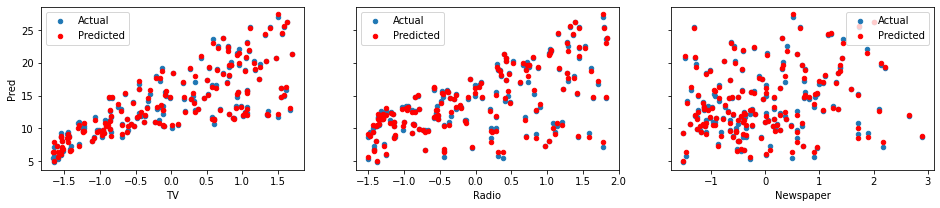

<<<-----------------------------------Evaluating ElasticNet Regression Model----------------------------------->>>



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 1.0
Residual Sum of Squares (RSS) on Training set  ---> 18.92
Mean Squared Error (MSE) on Training set       ---> 0.12
Root Mean Squared Error (RMSE) on Training set ---> 0.35

--------------------Test Set Metrics--------------------

R2-Score on Testing set ---> 0.98
Residual Sum of Squares (RSS) on Training set  ---> 31.96
Mean Squared Error (MSE) on Training set       ---> 0.8
Root Mean Squared Error (RMSE) on Training set ---> 0.89

--------------------Residual Plots--------------------


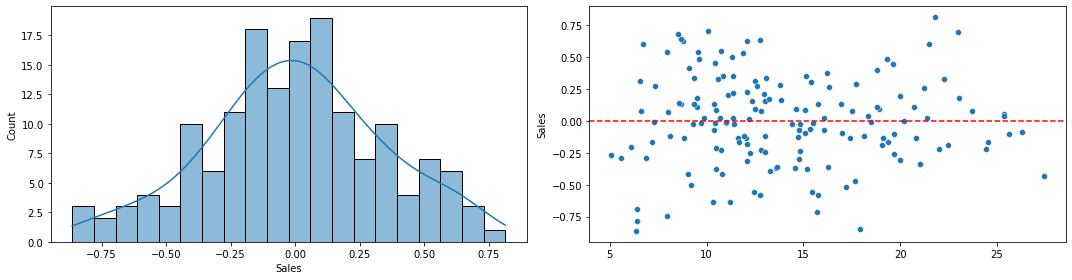


 -------------------------------------------------------

Inference: 
As we can observe from the summary of the 3rd order Polynomial Regression Model, we can note that it performs better compared to the 2nd Order, Let us check with higher degree Models.


In [239]:
#Creating a Polynomial Regression model (degree=3)

from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=3)
X_poly = poly_reg.fit_transform(Train_X_std)
X_poly1 = poly_reg.fit_transform(Test_X_std)
PR3 = LinearRegression()
PR3.fit(X_poly, Train_Y)

print('The Coeffecient of the Linear Regresion Model was found to be ',PR3.coef_)
print('The Intercept of the Linear Regresion Model was found to be ',PR3.intercept_)

#Plotting predicted predicteds alongside the actual datapoints 

pred = PR3.predict(X_poly)

fig,axs = plt.subplots(1,3, sharey=True)
Tr=pd.concat([Train_X_std, pd.DataFrame(Train_Y.values, columns=['Sales'])], axis=1)
Ts=pd.concat([Test_X_std, pd.DataFrame(Test_Y.values, columns=['Sales'])], axis=1)

Pr = Tr.copy()
Pr['Pred'] = pred

Tr.plot(kind='scatter',x='TV',y='Sales', ax=axs[0], figsize=(16,3), label='Actual')
Pr.plot(kind='scatter',x='TV',y='Pred',ax=axs[0], color='r', label='Predicted')

Tr.plot(kind='scatter',x='Radio',y='Sales',ax=axs[1], label='Actual')
Pr.plot(kind='scatter',x='Radio',y='Pred',ax=axs[1], color='r', label='Predicted')

Tr.plot(kind='scatter',x='Newspaper',y='Sales',ax=axs[2], label='Actual')
Pr.plot(kind='scatter',x='Newspaper',y='Pred',ax=axs[2], color='r', label='Predicted')

plt.show()

#Evaluating the Simple Linear Regression Model

print('{}{}\033[1mEvaluating ElasticNet Regression Model\033[0m{}{}\n'.format('<'*3,'-'*35, '-'*35,'>'*3))

print('\n\n{}Training Set Metrics{}'.format('-'*20, '-'*20))
pred1 = PR3.predict(X_poly)#Test_X_sm)
print('\nR2-Score on Training set --->',round(r2_score(Train_Y, pred1),2))
print('Residual Sum of Squares (RSS) on Training set  --->',round(np.sum(np.square(Train_Y-pred1)),2))
print('Mean Squared Error (MSE) on Training set       --->',round(mean_squared_error(Train_Y, pred1),2))
print('Root Mean Squared Error (RMSE) on Training set --->',round(np.sqrt(mean_squared_error(Train_Y, pred1)),2))

print('\n{}Test Set Metrics{}'.format('-'*20, '-'*20))
pred2 = PR3.predict(X_poly1)#Test_X_sm)
print('\nR2-Score on Testing set --->',round(r2_score(Test_Y, pred2),2))
print('Residual Sum of Squares (RSS) on Training set  --->',round(np.sum(np.square(Test_Y-pred2)),2))
print('Mean Squared Error (MSE) on Training set       --->',round(mean_squared_error(Test_Y, pred2),2))
print('Root Mean Squared Error (RMSE) on Training set --->',round(np.sqrt(mean_squared_error(Test_Y, pred2)),2))
print('\n{}Residual Plots{}'.format('-'*20, '-'*20))

ME(pred1, pred2,'PR3')
plt.figure(figsize=[15,4])

plt.subplot(1,2,1)
residuals=(Train_Y-pred1)
sns.histplot(residuals, bins=20, kde=True)

plt.subplot(1,2,2)
sns.scatterplot(pred1, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.tight_layout()
plt.show()

print('\n','-'*55)

print('\033[1m\nInference: \033[0m\nAs we can observe from the summary of the 3rd order Polynomial Regression Model, \
we can note that it performs better compared to the 2nd Order, Let us check with higher degree Models.')

The Coeffecient of the Linear Regresion Model was found to be  [ 1.16132742e-13  2.92518821e+00  2.85016895e+00 -1.86514173e-01
 -9.03107043e-02  1.35427725e+00 -1.50802960e-01 -1.04597766e-01
  1.16746875e-01  1.84098540e-01  3.77169855e-01 -4.07546927e-02
  2.00067102e-02 -7.35498873e-02  2.33714674e-02  2.95366657e-02
  3.37454755e-02  9.12190348e-02 -7.97242202e-02  1.45896267e-01
 -2.27385896e-01 -9.38839495e-02  9.61013713e-02 -1.66409345e-03
 -6.71540054e-02  4.61227445e-03  4.57760220e-02  5.85710034e-02
  1.11998215e-02 -5.33597929e-02  6.40355027e-02 -1.77085075e-01
  1.11800589e-01  5.32423929e-02 -9.35919581e-02]
The Intercept of the Linear Regresion Model was found to be  14.372423075164464


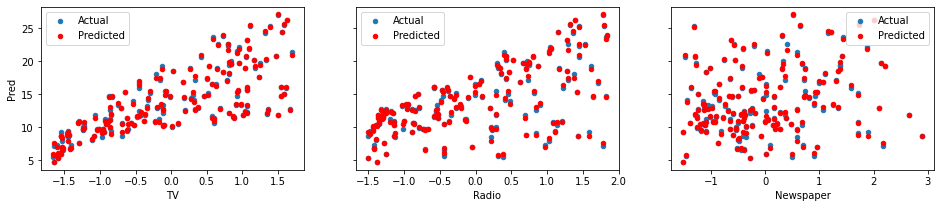

<<<-----------------------------------Evaluating ElasticNet Regression Model----------------------------------->>>



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 1.0
Residual Sum of Squares (RSS) on Training set  ---> 12.64
Mean Squared Error (MSE) on Training set       ---> 0.08
Root Mean Squared Error (RMSE) on Training set ---> 0.28

--------------------Test Set Metrics--------------------

R2-Score on Testing set ---> 0.97
Residual Sum of Squares (RSS) on Training set  ---> 36.02
Mean Squared Error (MSE) on Training set       ---> 0.9
Root Mean Squared Error (RMSE) on Training set ---> 0.95

--------------------Residual Plots--------------------


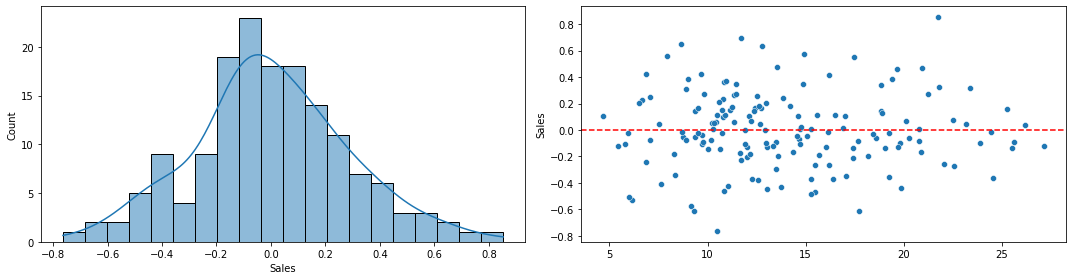


 -------------------------------------------------------

Inference: 
As we can observe from the summary of the 4th order Polynomial Regression Model, we can note that it performs doesn't better compared to the 3rd Order, Let us check with higher degree Models.


In [240]:
#Creating a Polynomial Regression model (degree=4)

from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(Train_X_std)
X_poly1 = poly_reg.fit_transform(Test_X_std)
PR4 = LinearRegression()
PR4.fit(X_poly, Train_Y)

print('The Coeffecient of the Linear Regresion Model was found to be ',PR4.coef_)
print('The Intercept of the Linear Regresion Model was found to be ',PR4.intercept_)

#Plotting predicted predicteds alongside the actual datapoints 

pred = PR4.predict(X_poly)

fig,axs = plt.subplots(1,3, sharey=True)
Tr=pd.concat([Train_X_std, pd.DataFrame(Train_Y.values, columns=['Sales'])], axis=1)
Ts=pd.concat([Test_X_std, pd.DataFrame(Test_Y.values, columns=['Sales'])], axis=1)

Pr = Tr.copy()
Pr['Pred'] = pred

Tr.plot(kind='scatter',x='TV',y='Sales', ax=axs[0], figsize=(16,3), label='Actual')
Pr.plot(kind='scatter',x='TV',y='Pred',ax=axs[0], color='r', label='Predicted')

Tr.plot(kind='scatter',x='Radio',y='Sales',ax=axs[1], label='Actual')
Pr.plot(kind='scatter',x='Radio',y='Pred',ax=axs[1], color='r', label='Predicted')

Tr.plot(kind='scatter',x='Newspaper',y='Sales',ax=axs[2], label='Actual')
Pr.plot(kind='scatter',x='Newspaper',y='Pred',ax=axs[2], color='r', label='Predicted')

plt.show()

#Evaluating the Simple Linear Regression Model

print('{}{}\033[1mEvaluating ElasticNet Regression Model\033[0m{}{}\n'.format('<'*3,'-'*35, '-'*35,'>'*3))

print('\n\n{}Training Set Metrics{}'.format('-'*20, '-'*20))
pred1 = PR4.predict(X_poly)#Test_X_sm)
print('\nR2-Score on Training set --->',round(r2_score(Train_Y, pred1),2))
print('Residual Sum of Squares (RSS) on Training set  --->',round(np.sum(np.square(Train_Y-pred1)),2))
print('Mean Squared Error (MSE) on Training set       --->',round(mean_squared_error(Train_Y, pred1),2))
print('Root Mean Squared Error (RMSE) on Training set --->',round(np.sqrt(mean_squared_error(Train_Y, pred1)),2))

print('\n{}Test Set Metrics{}'.format('-'*20, '-'*20))
pred2 = PR4.predict(X_poly1)#Test_X_sm)
print('\nR2-Score on Testing set --->',round(r2_score(Test_Y, pred2),2))
print('Residual Sum of Squares (RSS) on Training set  --->',round(np.sum(np.square(Test_Y-pred2)),2))
print('Mean Squared Error (MSE) on Training set       --->',round(mean_squared_error(Test_Y, pred2),2))
print('Root Mean Squared Error (RMSE) on Training set --->',round(np.sqrt(mean_squared_error(Test_Y, pred2)),2))
print('\n{}Residual Plots{}'.format('-'*20, '-'*20))

plt.figure(figsize=[15,4])

plt.subplot(1,2,1)
residuals=(Train_Y-pred1)
sns.histplot(residuals, bins=20, kde=True)

plt.subplot(1,2,2)
sns.scatterplot(pred1, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.tight_layout()
plt.show()

print('\n','-'*55)

print('\033[1m\nInference: \033[0m\nAs we can observe from the summary of the 4th order Polynomial Regression Model, \
we can note that it performs doesn\'t better compared to the 3rd Order, Let us check with higher degree Models.')

The Coeffecient of the Linear Regresion Model was found to be  [ 1.82624090e+12  3.38616779e+00  2.13166273e+00  3.27060204e-02
 -1.16328005e-01  1.38506675e+00  1.14847352e-01 -2.67039628e-02
 -2.28114035e-01  3.47675652e-01 -4.27429849e-01  1.82315564e-01
 -2.91972044e-02  4.34584861e-02  2.51429840e-01 -2.07268546e-01
  8.37114083e-01 -5.86445837e-01  3.94426835e-01 -2.05060127e-03
 -2.18948741e-01  1.02340573e-01 -1.17155205e-02  3.81521246e-03
  2.05100640e-01 -1.69738333e-01 -8.87210932e-02 -1.16959785e-01
  8.15785490e-02 -9.50284783e-02  1.03903280e-01 -2.23334683e-01
  1.54101567e-01 -7.93528009e-03 -3.84859185e-02  2.21262700e-01
 -3.21321064e-02  4.03857334e-02  1.40703503e-01 -1.43853446e-01
  9.12824932e-02 -6.52963404e-02 -2.45863760e-01  1.71100481e-01
 -1.89616108e-02 -5.15915376e-02  8.28042291e-02 -1.81891389e-01
  6.02510047e-02  1.90948893e-02 -2.47708701e-01  4.58147426e-01
 -3.62020579e-01  8.82912594e-02 -2.29407197e-02  1.67796521e-03]
The Intercept of the Linea

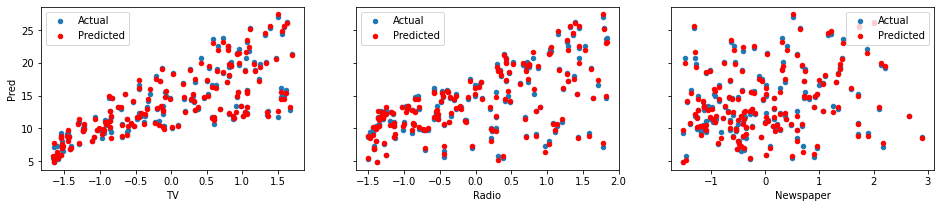

<<<-----------------------------------Evaluating ElasticNet Regression Model----------------------------------->>>



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.99
Residual Sum of Squares (RSS) on Training set  ---> 23.45
Mean Squared Error (MSE) on Training set       ---> 0.15
Root Mean Squared Error (RMSE) on Training set ---> 0.39

--------------------Test Set Metrics--------------------

R2-Score on Testing set ---> 0.96
Residual Sum of Squares (RSS) on Training set  ---> 57.61
Mean Squared Error (MSE) on Training set       ---> 1.44
Root Mean Squared Error (RMSE) on Training set ---> 1.2

--------------------Residual Plots--------------------


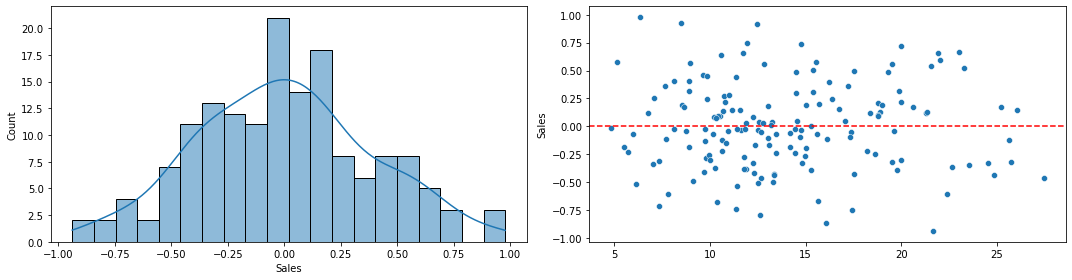


 -------------------------------------------------------

Inference: 
As we can observe from the summary of the 5th order Polynomial Regression Model, we can note that it performs better compared to the 4th Order, Let us check with higher degree Models.


In [241]:
#Creating a Polynomial Regression model (degree=5)

from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=5)
X_poly = poly_reg.fit_transform(Train_X_std)
X_poly1 = poly_reg.fit_transform(Test_X_std)
PR5 = LinearRegression()
PR5.fit(X_poly, Train_Y)

print('The Coeffecient of the Linear Regresion Model was found to be ',PR5.coef_)
print('The Intercept of the Linear Regresion Model was found to be ',PR5.intercept_)

#Plotting predicted predicteds alongside the actual datapoints 

pred = PR5.predict(X_poly)

fig,axs = plt.subplots(1,3, sharey=True)
Tr=pd.concat([Train_X_std, pd.DataFrame(Train_Y.values, columns=['Sales'])], axis=1)
Ts=pd.concat([Test_X_std, pd.DataFrame(Test_Y.values, columns=['Sales'])], axis=1)

Pr = Tr.copy()
Pr['Pred'] = pred

Tr.plot(kind='scatter',x='TV',y='Sales', ax=axs[0], figsize=(16,3), label='Actual')
Pr.plot(kind='scatter',x='TV',y='Pred',ax=axs[0], color='r', label='Predicted')

Tr.plot(kind='scatter',x='Radio',y='Sales',ax=axs[1], label='Actual')
Pr.plot(kind='scatter',x='Radio',y='Pred',ax=axs[1], color='r', label='Predicted')

Tr.plot(kind='scatter',x='Newspaper',y='Sales',ax=axs[2], label='Actual')
Pr.plot(kind='scatter',x='Newspaper',y='Pred',ax=axs[2], color='r', label='Predicted')

plt.show()

#Evaluating the Simple Linear Regression Model

print('{}{}\033[1mEvaluating ElasticNet Regression Model\033[0m{}{}\n'.format('<'*3,'-'*35, '-'*35,'>'*3))

print('\n\n{}Training Set Metrics{}'.format('-'*20, '-'*20))
pred1 = PR5.predict(X_poly)#Test_X_sm)
print('\nR2-Score on Training set --->',round(r2_score(Train_Y, pred1),2))
print('Residual Sum of Squares (RSS) on Training set  --->',round(np.sum(np.square(Train_Y-pred1)),2))
print('Mean Squared Error (MSE) on Training set       --->',round(mean_squared_error(Train_Y, pred1),2))
print('Root Mean Squared Error (RMSE) on Training set --->',round(np.sqrt(mean_squared_error(Train_Y, pred1)),2))

print('\n{}Test Set Metrics{}'.format('-'*20, '-'*20))
pred2 = PR5.predict(X_poly1)#Test_X_sm)
print('\nR2-Score on Testing set --->',round(r2_score(Test_Y, pred2),2))
print('Residual Sum of Squares (RSS) on Training set  --->',round(np.sum(np.square(Test_Y-pred2)),2))
print('Mean Squared Error (MSE) on Training set       --->',round(mean_squared_error(Test_Y, pred2),2))
print('Root Mean Squared Error (RMSE) on Training set --->',round(np.sqrt(mean_squared_error(Test_Y, pred2)),2))
print('\n{}Residual Plots{}'.format('-'*20, '-'*20))

plt.figure(figsize=[15,4])

plt.subplot(1,2,1)
residuals=(Train_Y-pred1)
sns.histplot(residuals, bins=20, kde=True)

plt.subplot(1,2,2)
sns.scatterplot(pred1, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.tight_layout()
plt.show()

print('\n','-'*55)

print('\033[1m\nInference: \033[0m\nAs we can observe from the summary of the 5th order Polynomial Regression Model, \
we can note that it performs better compared to the 4th Order, Let us check with higher degree Models.')

The Coeffecient of the Linear Regresion Model was found to be  [-2.32097337e+11  3.24341327e+00  2.25145354e+00  4.45590086e-02
 -4.78814152e-02  1.69730670e+00 -3.44185997e-01 -6.31439001e-01
  1.20514810e-01  9.79500934e-02 -3.10025786e-01  3.58344133e-01
 -3.33478402e-01  3.54446290e-01  2.41132014e-01 -3.07954850e-01
  3.75152541e-01 -3.24417993e-01  6.10369212e-01 -9.78805801e-02
  1.81176190e-02  2.80072705e-02  1.34664161e-01 -6.63890136e-02
 -3.31929224e-01 -4.04456024e-01 -2.87474445e-01  2.18257255e-01
 -7.12587622e-01  4.15223038e-01  7.37747958e-01  6.27307114e-02
 -3.07912395e-01  1.65298450e-01  2.07138375e-01  2.38738977e-01
 -8.60851463e-02  1.94524187e-01  4.38694437e-02 -1.99764274e-01
  3.16293275e-02 -1.14630024e-01  2.96053560e-02  4.97236581e-02
 -9.85719331e-02 -2.50359296e-01  1.76010147e-01 -2.35544178e-01
  4.25486610e-02  2.04842172e-01 -3.86455629e-03  4.07117711e-01
 -7.22498302e-01  2.08124411e-01 -7.54820775e-02  6.66746595e-02
 -8.14824941e-02 -2.0834508

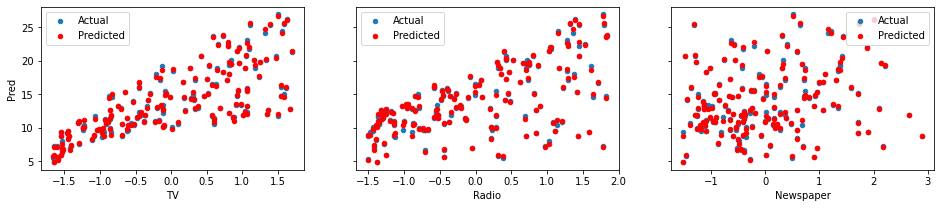

<<<-----------------------------------Evaluating ElasticNet Regression Model----------------------------------->>>



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 1.0
Residual Sum of Squares (RSS) on Training set  ---> 10.54
Mean Squared Error (MSE) on Training set       ---> 0.07
Root Mean Squared Error (RMSE) on Training set ---> 0.26

--------------------Test Set Metrics--------------------

R2-Score on Testing set ---> 0.98
Residual Sum of Squares (RSS) on Training set  ---> 29.3
Mean Squared Error (MSE) on Training set       ---> 0.73
Root Mean Squared Error (RMSE) on Training set ---> 0.86

--------------------Residual Plots--------------------


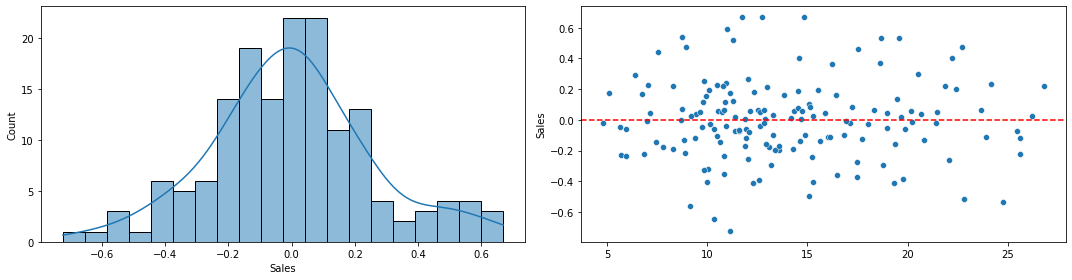


 -------------------------------------------------------

Inference: 
As we can observe from the summary of the 6th order Polynomial Regression Model, we can note that it performs doesn't better compared to the 5th Order, Let us check with higher degree Models.


In [242]:
#Creating a Polynomial Regression model (degree=6)

from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=6)
X_poly = poly_reg.fit_transform(Train_X_std)
X_poly1 = poly_reg.fit_transform(Test_X_std)
PR6 = LinearRegression()
PR6.fit(X_poly, Train_Y)

print('The Coeffecient of the Linear Regresion Model was found to be ',PR6.coef_)
print('The Intercept of the Linear Regresion Model was found to be ',PR6.intercept_)

#Plotting predicted predicteds alongside the actual datapoints 

pred = PR6.predict(X_poly)

fig,axs = plt.subplots(1,3, sharey=True)
Tr=pd.concat([Train_X_std, pd.DataFrame(Train_Y.values, columns=['Sales'])], axis=1)
Ts=pd.concat([Test_X_std, pd.DataFrame(Test_Y.values, columns=['Sales'])], axis=1)

Pr = Tr.copy()
Pr['Pred'] = pred

Tr.plot(kind='scatter',x='TV',y='Sales', ax=axs[0], figsize=(16,3), label='Actual')
Pr.plot(kind='scatter',x='TV',y='Pred',ax=axs[0], color='r', label='Predicted')

Tr.plot(kind='scatter',x='Radio',y='Sales',ax=axs[1], label='Actual')
Pr.plot(kind='scatter',x='Radio',y='Pred',ax=axs[1], color='r', label='Predicted')

Tr.plot(kind='scatter',x='Newspaper',y='Sales',ax=axs[2], label='Actual')
Pr.plot(kind='scatter',x='Newspaper',y='Pred',ax=axs[2], color='r', label='Predicted')

plt.show()

#Evaluating the Simple Linear Regression Model

print('{}{}\033[1mEvaluating ElasticNet Regression Model\033[0m{}{}\n'.format('<'*3,'-'*35, '-'*35,'>'*3))

print('\n\n{}Training Set Metrics{}'.format('-'*20, '-'*20))
pred1 = PR6.predict(X_poly)#Test_X_sm)
print('\nR2-Score on Training set --->',round(r2_score(Train_Y, pred1),2))
print('Residual Sum of Squares (RSS) on Training set  --->',round(np.sum(np.square(Train_Y-pred1)),2))
print('Mean Squared Error (MSE) on Training set       --->',round(mean_squared_error(Train_Y, pred1),2))
print('Root Mean Squared Error (RMSE) on Training set --->',round(np.sqrt(mean_squared_error(Train_Y, pred1)),2))

print('\n{}Test Set Metrics{}'.format('-'*20, '-'*20))
pred2 = PR6.predict(X_poly1)#Test_X_sm)
print('\nR2-Score on Testing set --->',round(r2_score(Test_Y, pred2),2))
print('Residual Sum of Squares (RSS) on Training set  --->',round(np.sum(np.square(Test_Y-pred2)),2))
print('Mean Squared Error (MSE) on Training set       --->',round(mean_squared_error(Test_Y, pred2),2))
print('Root Mean Squared Error (RMSE) on Training set --->',round(np.sqrt(mean_squared_error(Test_Y, pred2)),2))
print('\n{}Residual Plots{}'.format('-'*20, '-'*20))

ME(pred1, pred2,'PR6')
plt.figure(figsize=[15,4])

plt.subplot(1,2,1)
residuals=(Train_Y-pred1)
sns.histplot(residuals, bins=20, kde=True)

plt.subplot(1,2,2)
sns.scatterplot(pred1, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.tight_layout()
plt.show()

print('\n','-'*55)

print('\033[1m\nInference: \033[0m\nAs we can observe from the summary of the 6th order Polynomial Regression Model, \
we can note that it performs doesn\'t better compared to the 5th Order, Let us check with higher degree Models.')

The Coeffecient of the Linear Regresion Model was found to be  [-9.44974890e+10  3.25569666e+00  2.27302715e+00  7.89892924e-01
  6.73934113e-01  1.86796792e+00 -7.12110461e-01 -3.04843776e-01
 -1.12593125e-01  1.71858465e+00  5.13136390e-02  1.26696659e+00
 -6.69746278e-01  3.79432306e-01 -6.74705525e-01 -1.08378358e-01
 -8.81769130e-01 -1.47483346e+00  2.26098815e+00 -1.78461614e+00
 -4.61577216e-01  4.15349037e-01 -4.89211571e-01 -1.06851496e+00
  1.80063420e-01 -1.38608179e+00 -9.94796812e-01  4.08081855e+00
 -4.09442472e+00  1.32553873e+00  8.08658116e-01 -8.12043852e-01
 -2.42687239e+00  3.32380735e+00 -1.97694637e+00 -1.75951217e-01
 -1.24140556e+00  4.34028541e-02  7.19935711e-01  2.68666187e+00
 -2.68141955e+00  3.65870348e-01 -1.40536785e+00  9.68294300e-01
  1.33748636e+00 -1.20992149e+00  1.07585177e+00  2.62894262e+00
 -4.04269988e+00  1.78368400e+00  1.11651435e+00  1.57280363e+00
 -2.18335096e+00  3.90833796e-01 -7.02684449e-02  5.00344756e-01
 -8.21630552e-03 -1.9341901

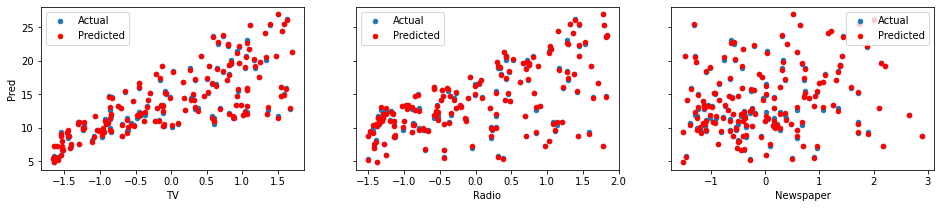

<<<-----------------------------------Evaluating ElasticNet Regression Model----------------------------------->>>



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 1.0
Residual Sum of Squares (RSS) on Training set  ---> 5.95
Mean Squared Error (MSE) on Training set       ---> 0.04
Root Mean Squared Error (RMSE) on Training set ---> 0.19

--------------------Test Set Metrics--------------------

R2-Score on Testing set ---> 0.5
Residual Sum of Squares (RSS) on Training set  ---> 655.72
Mean Squared Error (MSE) on Training set       ---> 16.39
Root Mean Squared Error (RMSE) on Training set ---> 4.05

--------------------Residual Plots--------------------


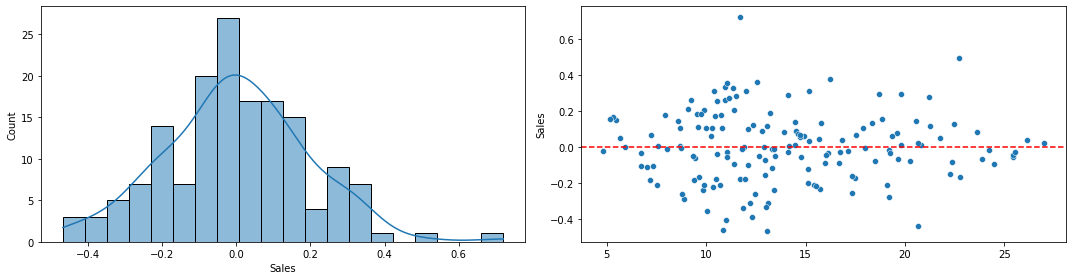


 -------------------------------------------------------

Inference: 
As we can observe from the summary of the 7th order Polynomial Regression Model, we can note that it performs doesn't better compared to the 6th Order, Let us check with higher degree Models.


In [243]:
#Creating a Polynomial Regression model (degree=7)

from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=7)
X_poly = poly_reg.fit_transform(Train_X_std)
X_poly1 = poly_reg.fit_transform(Test_X_std)
PR7 = LinearRegression()
PR7.fit(X_poly, Train_Y)

print('The Coeffecient of the Linear Regresion Model was found to be ',PR7.coef_)
print('The Intercept of the Linear Regresion Model was found to be ',PR7.intercept_)

#Plotting predicted predicteds alongside the actual datapoints 

pred = PR7.predict(X_poly)

fig,axs = plt.subplots(1,3, sharey=True)
Tr=pd.concat([Train_X_std, pd.DataFrame(Train_Y.values, columns=['Sales'])], axis=1)
Ts=pd.concat([Test_X_std, pd.DataFrame(Test_Y.values, columns=['Sales'])], axis=1)

Pr = Tr.copy()
Pr['Pred'] = pred

Tr.plot(kind='scatter',x='TV',y='Sales', ax=axs[0], figsize=(16,3), label='Actual')
Pr.plot(kind='scatter',x='TV',y='Pred',ax=axs[0], color='r', label='Predicted')

Tr.plot(kind='scatter',x='Radio',y='Sales',ax=axs[1], label='Actual')
Pr.plot(kind='scatter',x='Radio',y='Pred',ax=axs[1], color='r', label='Predicted')

Tr.plot(kind='scatter',x='Newspaper',y='Sales',ax=axs[2], label='Actual')
Pr.plot(kind='scatter',x='Newspaper',y='Pred',ax=axs[2], color='r', label='Predicted')

plt.show()

#Evaluating the Simple Linear Regression Model

print('{}{}\033[1mEvaluating ElasticNet Regression Model\033[0m{}{}\n'.format('<'*3,'-'*35, '-'*35,'>'*3))

print('\n\n{}Training Set Metrics{}'.format('-'*20, '-'*20))
pred1 = PR7.predict(X_poly)#Test_X_sm)
print('\nR2-Score on Training set --->',round(r2_score(Train_Y, pred1),2))
print('Residual Sum of Squares (RSS) on Training set  --->',round(np.sum(np.square(Train_Y-pred1)),2))
print('Mean Squared Error (MSE) on Training set       --->',round(mean_squared_error(Train_Y, pred1),2))
print('Root Mean Squared Error (RMSE) on Training set --->',round(np.sqrt(mean_squared_error(Train_Y, pred1)),2))

print('\n{}Test Set Metrics{}'.format('-'*20, '-'*20))
pred2 = PR7.predict(X_poly1)#Test_X_sm)
print('\nR2-Score on Testing set --->',round(r2_score(Test_Y, pred2),2))
print('Residual Sum of Squares (RSS) on Training set  --->',round(np.sum(np.square(Test_Y-pred2)),2))
print('Mean Squared Error (MSE) on Training set       --->',round(mean_squared_error(Test_Y, pred2),2))
print('Root Mean Squared Error (RMSE) on Training set --->',round(np.sqrt(mean_squared_error(Test_Y, pred2)),2))
print('\n{}Residual Plots{}'.format('-'*20, '-'*20))

plt.figure(figsize=[15,4])

plt.subplot(1,2,1)
residuals=(Train_Y-pred1)
sns.histplot(residuals, bins=20, kde=True)

plt.subplot(1,2,2)
sns.scatterplot(pred1, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.tight_layout()
plt.show()

print('\n','-'*55)

print('\033[1m\nInference: \033[0m\nAs we can observe from the summary of the 7th order Polynomial Regression Model, \
we can note that it performs doesn\'t better compared to the 6th Order, Let us check with higher degree Models.')

The Coeffecient of the Linear Regresion Model was found to be  [ 8.87965425e-09  5.95392631e-01  6.98580640e+00  8.94559432e-01
 -2.71110394e-01 -1.08558880e+01 -4.37634488e+00  1.31902994e+01
 -9.72802455e-01 -8.17537490e+00  1.25416438e+01  2.03304899e+00
  1.91284483e+01 -7.35910839e+00 -1.13452396e+01  1.32610846e+01
 -6.87504854e+00  4.72362705e+00  2.00303816e+00 -1.42196312e+01
  7.11425609e-02  2.42969968e+01  1.34685301e+01  5.48561191e-01
 -2.55056678e+00  2.60878851e+01  4.37036370e+00 -4.97735056e+00
  7.82795229e-01  5.29038237e+00 -1.12104311e+01 -7.12240439e+00
 -3.95231378e+01  1.01304908e+01  1.80185940e+01 -1.41395861e+01
 -5.93055862e+00 -3.31745697e+01  1.07348634e+01  4.86161974e+00
 -1.45928506e+01 -2.58417213e+00  9.58966367e+00  8.95713198e+00
  5.64830719e+00  4.34836205e+00 -3.85643524e+00 -8.81466758e+00
  4.74055113e+01 -3.33621328e+01  5.95448848e+00 -1.71421547e+01
  1.20824593e+01 -3.29631432e+00 -2.84581069e+01  2.68463929e+01
  1.01534546e+00 -1.0766892

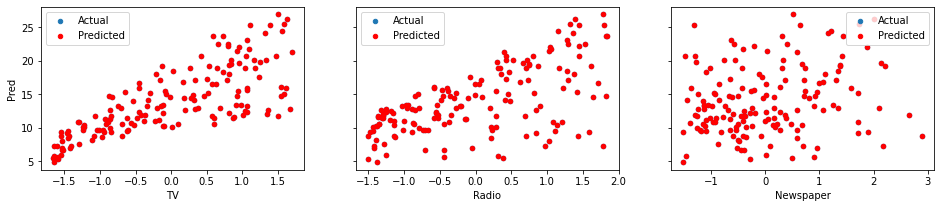

<<<-----------------------------------Evaluating ElasticNet Regression Model----------------------------------->>>



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 1.0
Residual Sum of Squares (RSS) on Training set  ---> 0.0
Mean Squared Error (MSE) on Training set       ---> 0.0
Root Mean Squared Error (RMSE) on Training set ---> 0.0

--------------------Test Set Metrics--------------------

R2-Score on Testing set ---> -342.45
Residual Sum of Squares (RSS) on Training set  ---> 453601.81
Mean Squared Error (MSE) on Training set       ---> 11340.05
Root Mean Squared Error (RMSE) on Training set ---> 106.49

--------------------Residual Plots--------------------


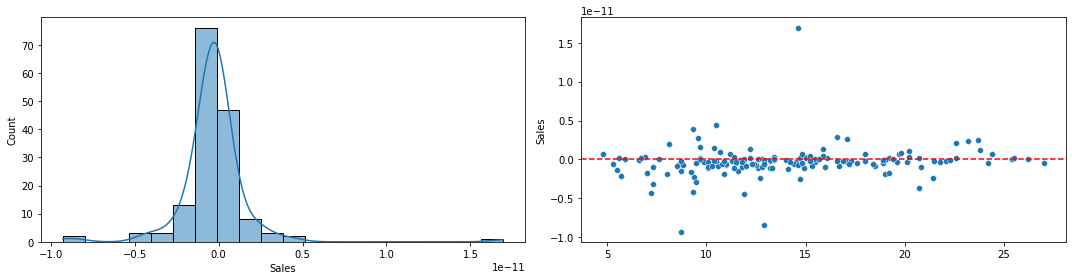


 -------------------------------------------------------

Inference: 
As we can observe from the summary of the 8th order Polynomial Regression Model, we can note that it does fully overfit on the data hence it's better to stop at this stage.


In [244]:
#Creating a Polynomial Regression model (degree=8)

from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=8)
X_poly = poly_reg.fit_transform(Train_X_std)
X_poly1 = poly_reg.fit_transform(Test_X_std)
PR9 = LinearRegression()
PR9.fit(X_poly, Train_Y)

print('The Coeffecient of the Linear Regresion Model was found to be ',PR9.coef_)
print('The Intercept of the Linear Regresion Model was found to be ',PR9.intercept_)

#Plotting predicted predicteds alongside the actual datapoints 

pred = PR9.predict(X_poly)

fig,axs = plt.subplots(1,3, sharey=True)
Tr=pd.concat([Train_X_std, pd.DataFrame(Train_Y.values, columns=['Sales'])], axis=1)
Ts=pd.concat([Test_X_std, pd.DataFrame(Test_Y.values, columns=['Sales'])], axis=1)

Pr = Tr.copy()
Pr['Pred'] = pred

Tr.plot(kind='scatter',x='TV',y='Sales', ax=axs[0], figsize=(16,3), label='Actual')
Pr.plot(kind='scatter',x='TV',y='Pred',ax=axs[0], color='r', label='Predicted')

Tr.plot(kind='scatter',x='Radio',y='Sales',ax=axs[1], label='Actual')
Pr.plot(kind='scatter',x='Radio',y='Pred',ax=axs[1], color='r', label='Predicted')

Tr.plot(kind='scatter',x='Newspaper',y='Sales',ax=axs[2], label='Actual')
Pr.plot(kind='scatter',x='Newspaper',y='Pred',ax=axs[2], color='r', label='Predicted')

plt.show()

#Evaluating the Simple Linear Regression Model

print('{}{}\033[1mEvaluating ElasticNet Regression Model\033[0m{}{}\n'.format('<'*3,'-'*35, '-'*35,'>'*3))

print('\n\n{}Training Set Metrics{}'.format('-'*20, '-'*20))
pred1 = PR9.predict(X_poly)#Test_X_sm)
print('\nR2-Score on Training set --->',round(r2_score(Train_Y, pred1),2))
print('Residual Sum of Squares (RSS) on Training set  --->',round(np.sum(np.square(Train_Y-pred1)),2))
print('Mean Squared Error (MSE) on Training set       --->',round(mean_squared_error(Train_Y, pred1),2))
print('Root Mean Squared Error (RMSE) on Training set --->',round(np.sqrt(mean_squared_error(Train_Y, pred1)),2))

print('\n{}Test Set Metrics{}'.format('-'*20, '-'*20))
pred2 = PR9.predict(X_poly1)#Test_X_sm)
print('\nR2-Score on Testing set --->',round(r2_score(Test_Y, pred2),2))
print('Residual Sum of Squares (RSS) on Training set  --->',round(np.sum(np.square(Test_Y-pred2)),2))
print('Mean Squared Error (MSE) on Training set       --->',round(mean_squared_error(Test_Y, pred2),2))
print('Root Mean Squared Error (RMSE) on Training set --->',round(np.sqrt(mean_squared_error(Test_Y, pred2)),2))
print('\n{}Residual Plots{}'.format('-'*20, '-'*20))

plt.figure(figsize=[15,4])

plt.subplot(1,2,1)
residuals=(Train_Y-pred1)
sns.histplot(residuals, bins=20, kde=True)

plt.subplot(1,2,2)
sns.scatterplot(pred1, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.tight_layout()
plt.show()

print('\n','-'*55)

print('\033[1m\nInference: \033[0m\nAs we can observe from the summary of the 8th order Polynomial Regression Model, \
we can note that it does fully overfit on the data hence it\'s better to stop at this stage.')

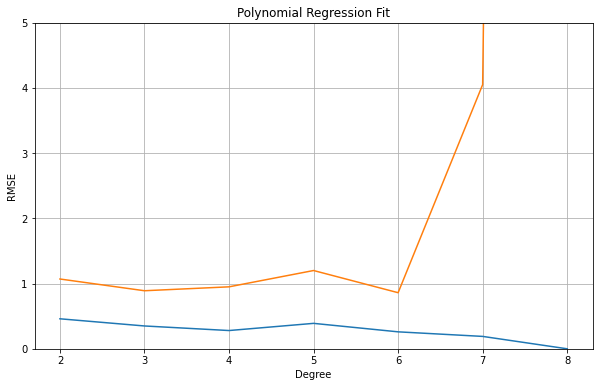

In [245]:
#Plotting polynomial regression results

Trr=[]; Tss=[]

for i in range(2,9):
    #print(f'{i} Degree')
    poly_reg = PolynomialFeatures(degree=i)
    X_poly = poly_reg.fit_transform(Train_X_std)
    X_poly1 = poly_reg.fit_transform(Test_X_std)
    LR = LinearRegression()
    LR.fit(X_poly, Train_Y)
    
    pred1 = LR.predict(X_poly)
    Trr.append(round(np.sqrt(mean_squared_error(Train_Y, pred1)),2))
    
    pred2 = LR.predict(X_poly1)
    Tss.append(round(np.sqrt(mean_squared_error(Test_Y, pred2)),2))

plt.plot(range(2,9),Trr)
plt.plot(range(2,9),Tss,)
plt.title('Polynomial Regression Fit')
plt.ylim([0,5])
plt.xlabel('Degree')
plt.ylabel('RMSE')
plt.grid()
#plt.xticks()
plt.show()

print('\033[1m\nInference: \033[0m\nIt is evident that as the polynomial degree increases, the training error reaches 0,\
but the testing error becomes very high, indicating that the model starts to overfits. Order 3 & 6 are deemed to be better fit\
compared to rest, so we share use these for further considerations')

In [311]:
# Regression Models Results Evaluation

Model_Evaluation_Comparison_Matrix
EMC = Model_Evaluation_Comparison_Matrix.copy()
EMC.index=['Simple Linear Regression(SLR)', 'Multiple Linear Regression(MLR)','Ridge Linear Regression(RLR)','Lasso Linear Regression(LLR)','Elastic-Net Regression (ENR)','Polynomial Regression Order-3(PN3)','Polynomial Regression Order-6(PN6)']
EMC

,R2-Score,Train_RSS,Train_MSE,Train_RMSE,Test_RSS,Test_MSE,Test_RMSE
Simple Linear Regression(SLR),0.58,1681.01,10.64,3.26,418.40,10.46,3.23
Multiple Linear Regression(MLR),0.90,381.14,2.41,1.55,190.69,4.77,2.18
Ridge Linear Regression(RLR),0.90,381.29,2.41,1.55,191.07,4.78,2.19
Lasso Linear Regression(LLR),0.83,688.16,4.36,2.09,299.78,7.49,2.74
Elastic-Net Regression (ENR),0.74,1026.14,6.49,2.55,422.57,10.56,3.25
Polynomial Regression Order-3(PN3),1.00,18.92,0.12,0.35,31.96,0.80,0.89
Polynomial Regression Order-6(PN6),1.00,10.54,0.07,0.26,29.30,0.73,0.86


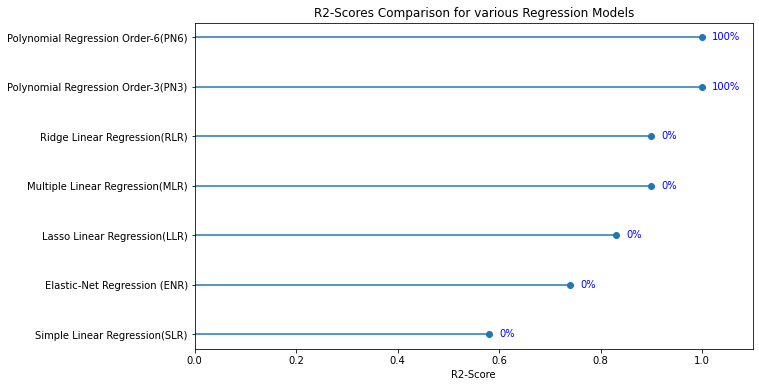


Inference: 
From the above plot, it is clear that the polynomial regresion models have the highest Explainability to understand the dataset.


In [345]:
# R2-Scores Comparison for different Regression Models

R2 = EMC['R2-Score'].sort_values(ascending=True)
plt.hlines(y=R2.index, xmin=0, xmax=R2.values)
plt.plot(R2.values, R2.index,'o')
plt.title('R2-Scores Comparison for various Regression Models')
plt.xlabel('R2-Score')
#plt.ylabel('Regression Models')
for i, v in enumerate(R2):
    plt.text(v+0.02, i-0.05, str(int(v)*100)+'%', color='blue')
plt.xlim([0,1.1])
plt.show()

print('\033[1m\nInference: \033[0m\nFrom the above plot, it is clear that the polynomial regresion models have the highest \
Explainability to understand the dataset.')

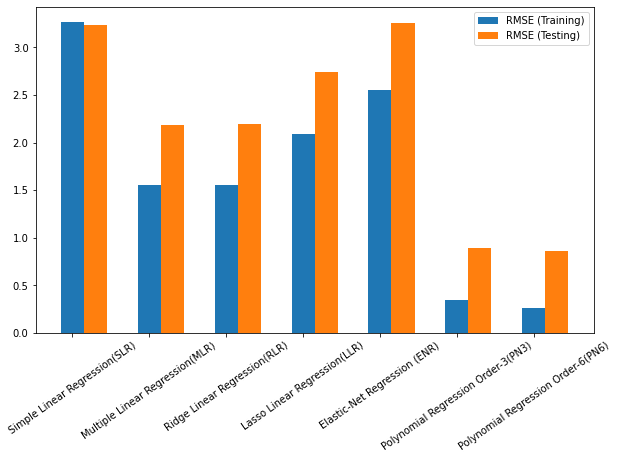


Inference: 
Lesser the RMSE, better the model! Also, provided the model should have close proximity with the training & testing scores. For this problem, it is can be said that polynomial regressions are the best choice to go with.


In [359]:
# Root Mean SquaredError Comparison for different Regression Models

plt.bar(np.arange(7), Model_Evaluation_Comparison_Matrix[cc[3]].values, width=0.3, label='RMSE (Training)')
plt.bar(np.arange(7)+0.3, Model_Evaluation_Comparison_Matrix[cc[6]].values, width=0.3, label='RMSE (Testing)')
plt.xticks(np.arange(7),EMC.index, rotation =35)
plt.legend()
plt.show()

print('\033[1m\nInference: \033[0m\nLesser the RMSE, better the model! Also, provided the model should have close proximity \
with the training & testing scores. For this problem, it is can be said that polynomial regressions are the best choice \
to go with.')

---

## <center> 10. Project Outcomes & Conclusions

### Here are some of the key outcomes of the project:
- The Dataset was quiet small totally just 200 samples & after preprocessing 1% of the datasamples were dropped. 
- Visualising the distribution of data & their relationships, helped us to get some insights on the target-feature.
- Feature selection or feature extracting as there were only 3 features, which all contributed towards the right prediction.
- Testing multiple algorithms with default hyperparamters gave us some understanding for various models performance on this specific dataset.
- While, Polynomial Regression (Order-6) gave the best overall scores for the current dataset, yet it wise to also consider simpler models like MLR & ENR as they are more generalisable.

In [ ]:
<<<----------------------------------------------THE END---------------------------------------------------------->>>